In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# TASK1

In [2]:
df1 = pd.read_csv('DS2_C6_S2_MoveHubQualityOfLife_Data_Practice.csv')
df2 = pd.read_csv('DS2_C6_S2_MoveHubCostOfLiving_Data_Practice.csv')
df3 = pd.read_csv('DS2_C6_S2_WorldCities_Data_Practice.csv')
df4 = pd.read_csv('DS2_C6_S2_Cities_Data_Practice.csv')

In [3]:
print(df1.shape)
df1.head()

(216, 7)


,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65
3,Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13
4,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86


In [4]:
print(df2.shape)
df2.head()

(216, 7)


,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Lausanne,3.15,12.59,8.40,1.32,1714.00,4266.11
1,Zurich,3.28,12.59,8.40,1.31,2378.61,4197.55
2,Geneva,2.80,12.94,10.49,1.28,2607.95,3917.72
3,Basel,3.50,11.89,7.35,1.25,1649.29,3847.76
4,Perth,2.87,11.43,10.08,0.97,2083.14,3358.55


In [5]:
print(df3.shape)
df3 = df3.rename(columns={'city':'City'})
df3.head()

(26569, 11)


,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [6]:
print(df4.shape)
df4.head()

(3543, 2)


,City,Country
0,Oakland,United States
1,Oakville,Canada
2,Oaxaca de Juárez,Mexico
3,Oberhausen,Germany
4,Obihiro,Japan


### Now we have to Merge Data

In [7]:
df5 = df1.merge(df2, on='City', how = 'inner')

In [8]:
df6 = df5.merge(df4, on='City', how = 'inner')

In [9]:
Final_df = df6.merge(df3, on='City', how = 'inner')

In [10]:
Final_df.head()

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,...,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70,1.80,9.12,11.97,...,Caracas,10.5000,-66.9333,Venezuela,VE,VEN,Distrito Capital,primary,1943901.0,1862748204
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93,1.16,3.46,3.53,...,Johannesburg,-26.2044,28.0416,South Africa,ZA,ZAF,Gauteng,admin,4434827.0,1710550792
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65,1.46,5.20,5.85,...,Fortaleza,-3.7275,-38.5275,Brazil,BR,BRA,Ceará,admin,2452185.0,1076567885
3,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86,1.60,3.20,7.47,...,Mexico City,19.4333,-99.1333,Mexico,MX,MEX,Ciudad de México,primary,20996000.0,1484247881
4,Detroit,70.63,73.81,63.05,83.45,50.99,76.69,1.96,5.56,7.85,...,Detroit,42.3834,-83.1024,United States,US,USA,Michigan,NaN,3506126.0,1840003971


### Removing Duplicate 

In [11]:
Final_df.drop_duplicates(subset='City', keep='first', inplace=True, ignore_index=True)

In [12]:
FD = Final_df.copy()
Final_df.head()

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,...,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70,1.80,9.12,11.97,...,Caracas,10.5000,-66.9333,Venezuela,VE,VEN,Distrito Capital,primary,1943901.0,1862748204
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93,1.16,3.46,3.53,...,Johannesburg,-26.2044,28.0416,South Africa,ZA,ZAF,Gauteng,admin,4434827.0,1710550792
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65,1.46,5.20,5.85,...,Fortaleza,-3.7275,-38.5275,Brazil,BR,BRA,Ceará,admin,2452185.0,1076567885
3,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86,1.60,3.20,7.47,...,Mexico City,19.4333,-99.1333,Mexico,MX,MEX,Ciudad de México,primary,20996000.0,1484247881
4,Detroit,70.63,73.81,63.05,83.45,50.99,76.69,1.96,5.56,7.85,...,Detroit,42.3834,-83.1024,United States,US,USA,Michigan,NaN,3506126.0,1840003971


# Label Encoding

In [13]:
Final_df.dtypes

City                      object
Movehub Rating           float64
Purchase Power           float64
Health Care              float64
Pollution                float64
Quality of Life          float64
Crime Rating             float64
Cappuccino               float64
Cinema                   float64
Wine                     float64
Gasoline                 float64
Avg Rent                 float64
Avg Disposable Income    float64
Country                   object
city_ascii                object
lat                      float64
lng                      float64
country                   object
iso2                      object
iso3                      object
admin_name                object
capital                   object
population               float64
id                         int64
dtype: object

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [15]:
Final_df['City'] = label_encoder.fit_transform(Final_df['City'])
Final_df['Country'] = label_encoder.fit_transform(Final_df['Country'])
Final_df['city_ascii'] = label_encoder.fit_transform(Final_df['city_ascii'])
Final_df['country'] = label_encoder.fit_transform(Final_df['country'])
Final_df['iso2'] = label_encoder.fit_transform(Final_df['iso2'])
Final_df['iso3'] = label_encoder.fit_transform(Final_df['iso3'])
Final_df['admin_name'] = label_encoder.fit_transform(Final_df['admin_name'])
Final_df['capital'] = label_encoder.fit_transform(Final_df['capital'])

In [16]:
Final_df.dtypes

City                       int32
Movehub Rating           float64
Purchase Power           float64
Health Care              float64
Pollution                float64
Quality of Life          float64
Crime Rating             float64
Cappuccino               float64
Cinema                   float64
Wine                     float64
Gasoline                 float64
Avg Rent                 float64
Avg Disposable Income    float64
Country                    int32
city_ascii                 int32
lat                      float64
lng                      float64
country                    int32
iso2                       int32
iso3                       int32
admin_name                 int32
capital                    int32
population               float64
id                         int64
dtype: object

# Scalling

In [17]:
from sklearn import preprocessing

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
final_df = Final_df.drop(['lat','lng','id'],axis=1)
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(final_df),columns=final_df.columns)

In [20]:
scaled_df.head()

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,...,Avg Rent,Avg Disposable Income,Country,city_ascii,country,iso2,iso3,admin_name,capital,population
0,-0.904962,-2.176614,-1.700733,-1.481790,1.486996,-2.307348,2.775615,-0.268757,0.353678,1.378240,...,0.759228,-0.985740,1.351622,-0.904962,1.370744,1.576895,1.562330,-0.825137,0.379202,-0.332191
1,-0.068115,0.663846,0.405923,-0.430037,0.085325,-0.370363,2.664960,-1.122781,-0.576549,-1.040494,...,-0.617552,-0.279118,0.822140,-0.068115,0.844637,1.662693,1.647375,-0.697807,-1.308248,0.044584
2,-0.437885,0.076217,0.321637,-1.412756,0.821144,-1.032526,2.334869,-0.722457,-0.290578,-0.375629,...,-0.699629,-0.124931,-1.336520,-0.437885,-1.300263,-1.211532,-1.159087,-0.973688,-1.308248,-0.255309
3,0.437885,-0.690257,-1.058484,-0.309566,-1.020152,-1.430823,2.285480,-0.535639,-0.619280,0.088630,...,-0.556080,-0.920466,-0.033178,0.437885,-0.005229,0.418626,0.371710,-0.910023,0.379202,2.549614
4,-0.613039,-1.357539,1.382851,-0.222258,1.486996,-0.382626,2.212335,-0.055251,-0.231412,0.197531,...,-0.726415,0.524708,1.270163,-0.613039,1.289805,1.491098,1.519808,0.235941,1.222927,-0.095890


# TASK2

For n_clusters = 2 The average silhouette_score is : 0.18319546488694172
For n_clusters = 3 The average silhouette_score is : 0.176016270239076
For n_clusters = 4 The average silhouette_score is : 0.1413321114306662
For n_clusters = 5 The average silhouette_score is : 0.1268926632999926
For n_clusters = 6 The average silhouette_score is : 0.1292403220236448
For n_clusters = 7 The average silhouette_score is : 0.1376775089251006


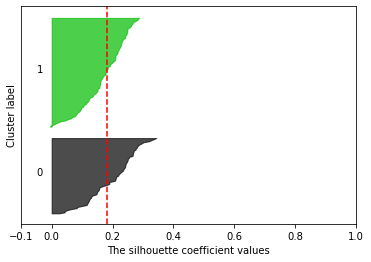

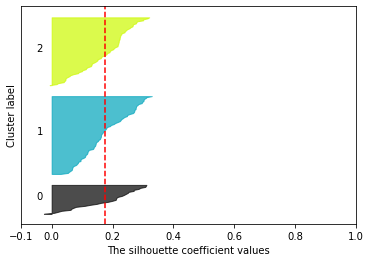

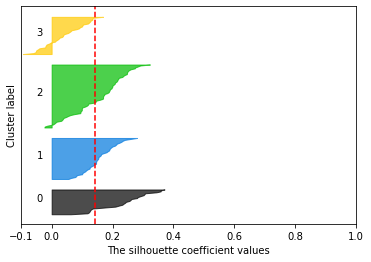

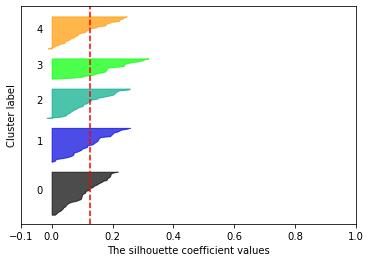

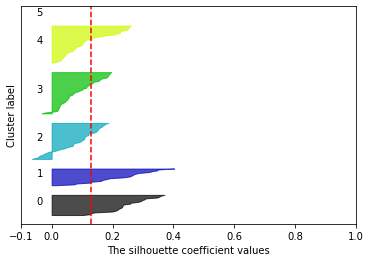

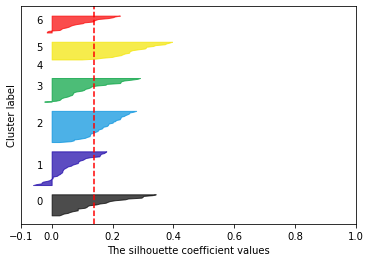

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(scaled_df) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_df)

    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Hence best n_clusters is two

# TASK3

#### For Two clusters

In [22]:
Kmeans_model = KMeans(n_clusters=2)
Kmeans_model.fit(scaled_df)

KMeans(n_clusters=2)

In [23]:
cluster_centroid = Kmeans_model.cluster_centers_
cluster_centroid

array([[-0.02679296, -0.92530431, -0.94987015, -0.54635434,  0.43576141,
        -0.98868424,  0.4049381 , -0.78241397, -0.43928177, -0.23057244,
        -0.28001862, -0.64070902, -0.98451491, -0.22566688, -0.02679296,
        -0.15324895,  0.12244703,  0.11017011, -0.0620331 , -0.08311283,
         0.34724004],
       [ 0.01862749,  0.64330681,  0.66038591,  0.37984635, -0.30295793,
         0.68737095, -0.2815284 ,  0.543964  ,  0.30540542,  0.16030274,
         0.19467961,  0.44544532,  0.68447227,  0.15689221,  0.01862749,
         0.10654451, -0.08512984, -0.07659446,  0.04312777,  0.05778321,
        -0.2414145 ]])

In [24]:
labels = Kmeans_model.labels_
len(labels)

178

In [25]:
FD['Labels'] = labels 

In [26]:
g = FD.groupby('Labels')

In [27]:
g.get_group(1).City.unique()

array(['Rotterdam', 'Las Vegas', 'Cape Town', 'Los Angeles', 'Houston',
       'Glasgow', 'Dallas', 'Baltimore', 'Milan', 'Atlanta', 'Orlando',
       'Chicago', 'Geneva', 'Brussels', 'Paris', 'Christchurch',
       'Auckland', 'London', 'Perth', 'Muscat', 'Melbourne', 'Dublin',
       'Birmingham', 'New York', 'Lyon', 'Nice', 'Toulouse', 'Strasbourg',
       'Marseille', 'Haifa', 'Jerusalem', 'Brisbane', 'Nottingham',
       'Honolulu', 'Alicante', 'Gold Coast', 'Bristol', 'Austin',
       'Victoria', 'New Orleans', 'Seattle', 'Regina', 'Adelaide',
       'Helsinki', 'Boston', 'Canberra', 'Madrid', 'Nicosia', 'Cork',
       'Hamilton', 'Lausanne', 'Oslo', 'Belfast', 'Brighton', 'Darwin',
       'Sydney', 'Copenhagen', 'Riyadh', 'Edmonton', 'Edinburgh',
       'Charlotte', 'Indianapolis', 'Newark', 'Vancouver', 'The Hague',
       'Amsterdam', 'Utrecht', 'Calgary', 'Leeds', 'Liverpool', 'Basel',
       'Vienna', 'Toronto', 'Wellington', 'Doha', 'Cologne', 'Valencia',
       'Stockholm'

In [28]:
g.get_group(1).City.unique()

array(['Rotterdam', 'Las Vegas', 'Cape Town', 'Los Angeles', 'Houston',
       'Glasgow', 'Dallas', 'Baltimore', 'Milan', 'Atlanta', 'Orlando',
       'Chicago', 'Geneva', 'Brussels', 'Paris', 'Christchurch',
       'Auckland', 'London', 'Perth', 'Muscat', 'Melbourne', 'Dublin',
       'Birmingham', 'New York', 'Lyon', 'Nice', 'Toulouse', 'Strasbourg',
       'Marseille', 'Haifa', 'Jerusalem', 'Brisbane', 'Nottingham',
       'Honolulu', 'Alicante', 'Gold Coast', 'Bristol', 'Austin',
       'Victoria', 'New Orleans', 'Seattle', 'Regina', 'Adelaide',
       'Helsinki', 'Boston', 'Canberra', 'Madrid', 'Nicosia', 'Cork',
       'Hamilton', 'Lausanne', 'Oslo', 'Belfast', 'Brighton', 'Darwin',
       'Sydney', 'Copenhagen', 'Riyadh', 'Edmonton', 'Edinburgh',
       'Charlotte', 'Indianapolis', 'Newark', 'Vancouver', 'The Hague',
       'Amsterdam', 'Utrecht', 'Calgary', 'Leeds', 'Liverpool', 'Basel',
       'Vienna', 'Toronto', 'Wellington', 'Doha', 'Cologne', 'Valencia',
       'Stockholm'

In [29]:
x = Kmeans_model.cluster_centers_[0][6:8]
y = Kmeans_model.cluster_centers_[1][6:8]

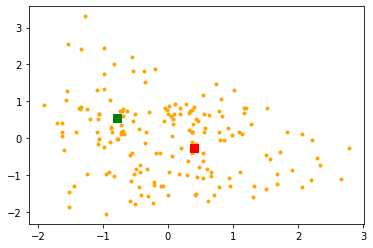

In [30]:
centroid_colors=['red','green']
c=0
plt.scatter(scaled_df['Crime Rating'], scaled_df['Cappuccino'], marker='.', c='orange')
for i,j in zip(x,y):
    plt.scatter(i, j, s=50, c=centroid_colors[c], marker='s')
    c=c+1
plt.show()

### for four clusters

In [31]:
Kmeans_model = KMeans(n_clusters=4)
Kmeans_model.fit(scaled_df)

KMeans(n_clusters=4)

In [32]:
cluster_centroid = Kmeans_model.cluster_centers_
cluster_centroid

array([[ 0.02861993, -0.91427546, -0.95268417, -0.73999311,  0.65134834,
        -0.99917214,  0.20193007, -0.90495732, -0.50805289, -0.18235612,
        -0.44042804, -0.82776842, -1.08580654, -0.97834088,  0.02861993,
        -0.96698231, -0.71314787, -0.72761202,  0.03620848,  0.00697063,
         0.56752916],
       [ 0.03231579,  0.61848131,  0.51695909,  0.48936399, -0.47825885,
         0.67799622, -0.42346598,  0.54638807,  0.25117136,  0.06885292,
         0.56336241,  0.42780677,  0.65454949, -0.14128746,  0.03231579,
        -0.21857008, -0.54421599, -0.5385784 ,  0.04232682, -0.01661936,
        -0.30802587],
       [-0.00819434, -0.90627711, -0.99083968, -0.37279337,  0.22113665,
        -0.98191132,  0.51673793, -0.68277561, -0.38321998, -0.28497923,
        -0.13994833, -0.49768793, -0.93607861,  0.44056914, -0.00819434,
         0.58158296,  0.87583741,  0.86407204, -0.21753028, -0.1980833 ,
         0.16618778],
       [-0.13117086,  0.61707639,  1.12677933, -0.01250278

In [33]:
labels = Kmeans_model.labels_
len(labels)

178

In [34]:
FD['Labels'] = labels 

In [35]:
g = FD.groupby('Labels')

In [36]:
g.get_group(0).City.unique()

array(['Fortaleza', 'Porto Alegre', 'Gurgaon', 'Santo Domingo',
       'Buenos Aires', 'Dhaka', 'Athens', 'Tehran', 'Delhi', 'Bangalore',
       'Belo Horizonte', 'Gaborone', 'Cairo', 'Quito', 'Jakarta', 'Sofia',
       'Tirana', 'Beijing', 'Curitiba', 'Santiago', 'Pune', 'Baku',
       'Varna', 'Mumbai', 'Prague', 'Budapest', 'Chennai', 'Zagreb',
       'Vadodara', 'Minsk', 'Addis Ababa', 'Indore', 'Kochi', 'Shanghai'],
      dtype=object)

In [37]:
g.get_group(2).City.unique()

array(['Caracas', 'Johannesburg', 'Mexico City', 'Karachi', 'Nairobi',
       'Kuala Lumpur', 'Pretoria', 'Manila', 'Lima', 'Rome', 'Lagos',
       'Saint Petersburg', 'Naples', 'Kharkiv', 'Moscow', 'Lahore',
       'Hanoi', 'Montevideo', 'Colombo', 'Ulaanbaatar', 'Amman', 'Bogota',
       'Antalya', 'Barcelona', 'Lisbon', 'Casablanca', 'Belgrade',
       'Chiang Mai', 'Porto', 'Bangkok', 'Bratislava', 'Bucharest',
       'Ljubljana', 'Warsaw', 'Vilnius', 'Valencia', 'Braga', 'Taipei'],
      dtype=object)

In [38]:
g.get_group(2).City.unique()

array(['Caracas', 'Johannesburg', 'Mexico City', 'Karachi', 'Nairobi',
       'Kuala Lumpur', 'Pretoria', 'Manila', 'Lima', 'Rome', 'Lagos',
       'Saint Petersburg', 'Naples', 'Kharkiv', 'Moscow', 'Lahore',
       'Hanoi', 'Montevideo', 'Colombo', 'Ulaanbaatar', 'Amman', 'Bogota',
       'Antalya', 'Barcelona', 'Lisbon', 'Casablanca', 'Belgrade',
       'Chiang Mai', 'Porto', 'Bangkok', 'Bratislava', 'Bucharest',
       'Ljubljana', 'Warsaw', 'Vilnius', 'Valencia', 'Braga', 'Taipei'],
      dtype=object)

In [39]:
g.get_group(3).City.unique()

array(['Detroit', 'Las Vegas', 'Cape Town', 'Los Angeles', 'Houston',
       'Dallas', 'Baltimore', 'Atlanta', 'Orlando', 'Chicago', 'Muscat',
       'New York', 'Honolulu', 'Austin', 'New Orleans', 'Seattle',
       'Boston', 'Riyadh', 'Charlotte', 'Indianapolis', 'Newark', 'Doha',
       'Gothenburg', 'Nashville', 'Singapore'], dtype=object)

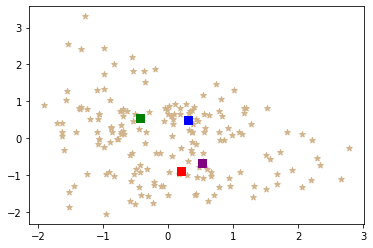

In [40]:
centroid_colors=['red','green','purple','blue']
c=0
plt.scatter(scaled_df['Crime Rating'], scaled_df['Cappuccino'], marker='*', c='tan')
for i,j in Kmeans_model.cluster_centers_[:,6:8]:
    plt.scatter(i, j, s=50, c=centroid_colors[c], marker='s')
    c=c+1
plt.show()